# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "./traffic-signs-data/train.p"
testing_file = "./traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [18]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(list(set(y_train)))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print(len(y_train))

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43
39209


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

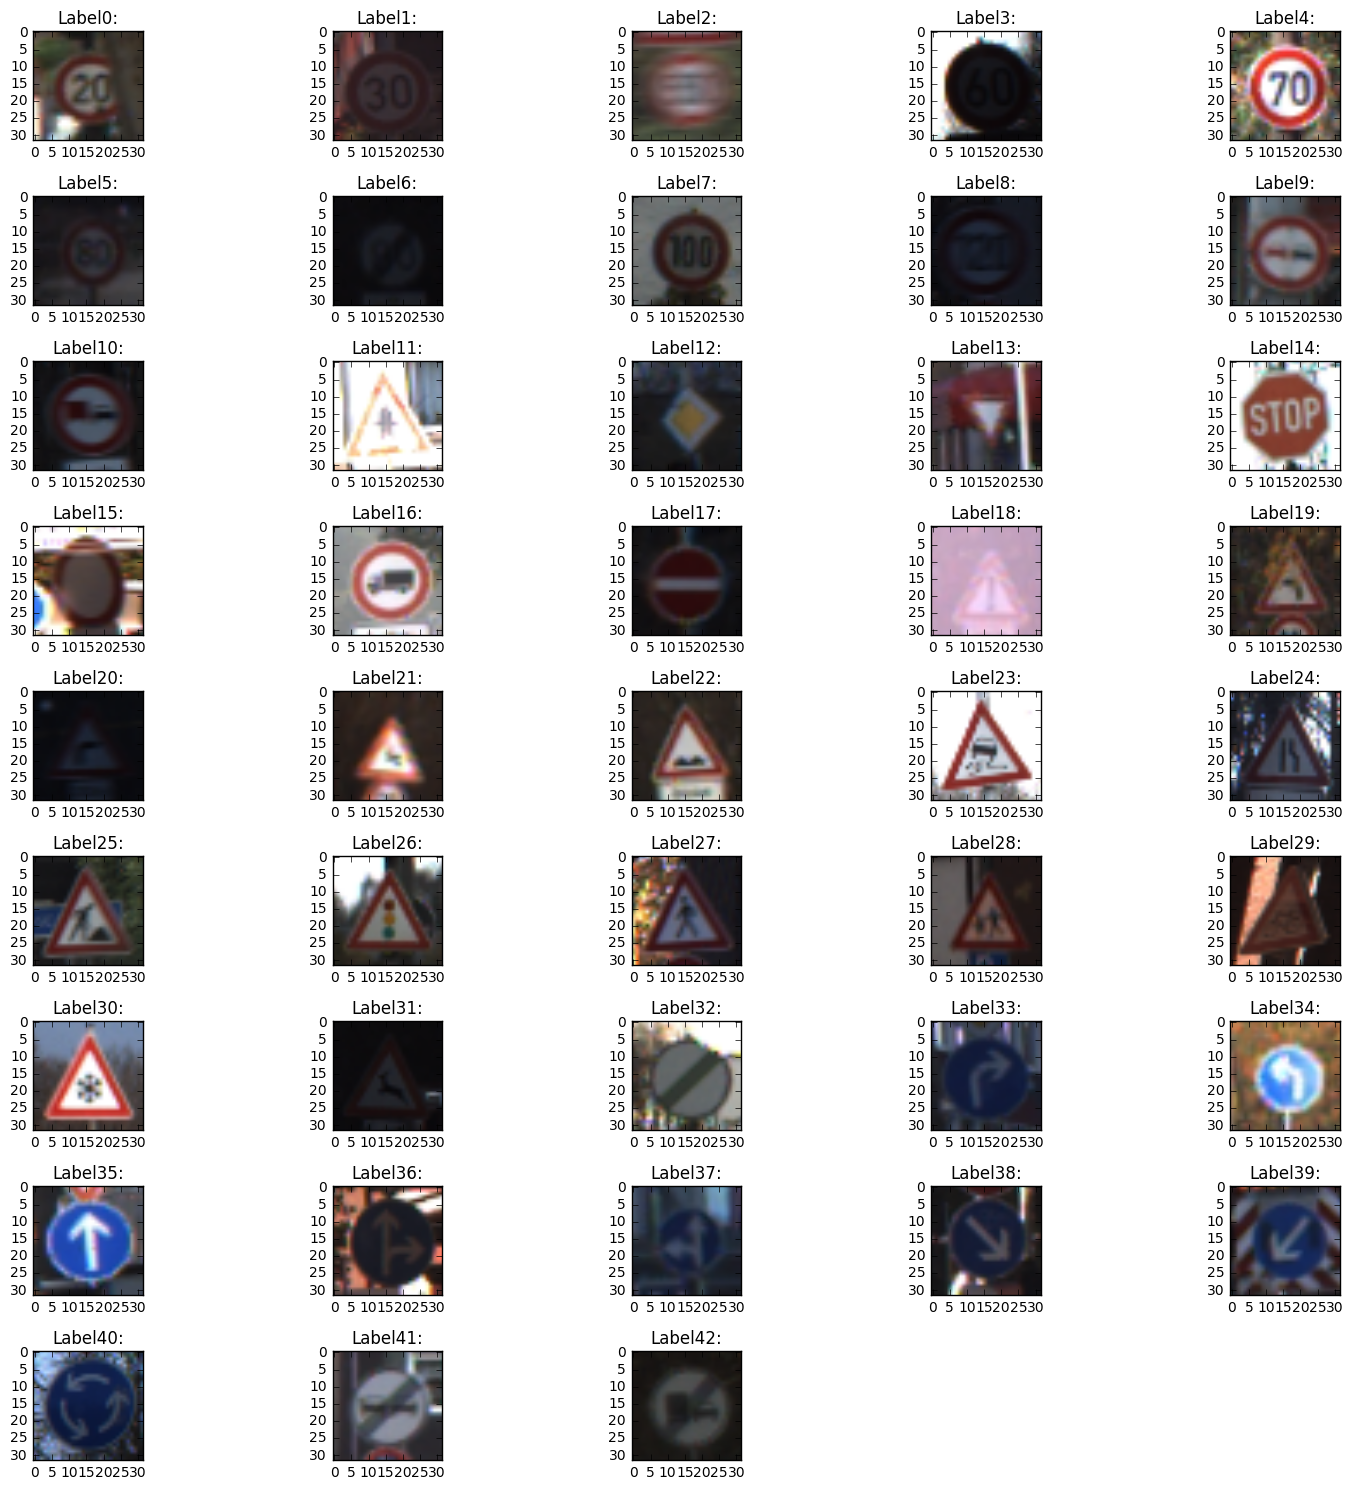

In [27]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
import numpy as np
# Visualizations will be shown in the notebook.
%matplotlib inline

plt.figure(figsize=(15,15))
for i in range(n_classes):
    while(1):
        index = random.randint(0,len(X_train)-1)
        if y_train[index] == i:
            image = X_train[index].squeeze()
            plt.subplot(n_classes/5+1,5,i+1)# -int((i+1)/5*4))
            plt.title("Label"+str(i)+":")
            plt.tight_layout()
            plt.imshow(image,cmap='gray')
            #print("the label is", y_train[index])
            break



## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

the label is  1


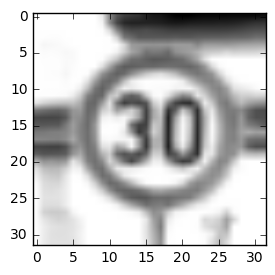

In [4]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
import numpy as np
import cv2

def Preprocessing(img):
    # Normalized img to (-1, +1)
    img = img.astype('float32')
    img = img/255*2-1
    
    #rgb2gray
    img = np.dot(img[...,:3],[[0.299],[0.587],[0.114]])
    return img


X_train = Preprocessing(X_train)
X_test = Preprocessing(X_test)

import matplotlib.pyplot as plt
import random
import numpy as np
# Visualizations will be shown in the notebook.
%matplotlib inline

index = random.randint(0,len(X_train))

image = X_train[index].squeeze()
plt.figure(figsize=(3,3))
plt.imshow(image,cmap = 'gray')
print("the label is ", y_train[index])


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

There are two techniques that I take to preprocess the images. First, I normalized images to the range of (-1,+1). Second, I change the source images frome RGB to Gray. The reasons are as follows:
1. After normalization, the scale of each feature is controlled in the same range.
2. The color of traffic signs is single and can not provide much information. In contrast, the outline of the image is much more important. Grayscale images can reflect the overall and local features of the image.
3. Because grayscale images use just one channel of color, choosing the grayscale can improve the speed of the algorithm.

In [5]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
from sklearn.cross_validation import train_test_split
from sklearn.utils import shuffle
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = 0.3, random_state = 42)

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
1. I divided the original training data into training set and validation set according to the ratio of 7 to 3.
2. I used the original test data as the test set.

In [6]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
from tensorflow.contrib.layers import flatten
from math import ceil

def LeNet(x, mu=0, sigma=0.1, conv1_filter=5, conv1_depth=6, conv1_strides=1, pool1_ksize=2,pool1_strides=2,\
         conv2_filter=5, conv2_depth=16, conv2_strides=1, pool2_ksize=2, pool2_strides=2,\
         layer3_depth=120, layer4_depth=84):
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(conv1_filter, conv1_filter, 1, conv1_depth), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(conv1_depth))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, conv1_strides, conv1_strides, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, pool1_ksize, pool1_ksize, 1], strides=[1, pool1_strides, pool1_strides, 1], padding='VALID')
    
    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(conv2_filter, conv2_filter, conv1_depth, conv2_depth), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(conv2_depth))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, conv2_strides, conv2_strides, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, pool2_ksize, pool2_ksize, 1], strides=[1, pool2_strides, pool2_strides, 1], padding='VALID')
    
    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, layer3_depth), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(layer3_depth))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(layer3_depth, layer4_depth), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(layer4_depth))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(layer4_depth, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

I used LeNet to classify traffic signs. It has 7 layers.  

Convolution layer 1. The input shape is 32x32x1. The output shape is 28x28x6.

Activation 1. Choose Relu as activition function.

Pooling layer 1. The output shape is 14x14x6.

Convolution layer 2. The output shape is10x10x16.

Activation 2. Choose Relu as activation funciton.

Pooling layer 2. The output shape should be 5x5x16.

Flatten layer. Flatten the output shape of the final pooling layer to 1D instead of 3D.

Fully connected layer 1. It has 120 outputs.

Activation 3. Choose Relu as activation function.

Fully connected layer 2. It has 84 outputs.

Activation 4. Choose Relu as activation function.

Fully connected layer 3. It has 43 outputs.


In [7]:
### Train your model here.
### Feel free to use as many code cells as needed.

#Setup Tensorflow
mu = 0          
sigma = 0.1        
EPOCHS = 40        
BATCH_SIZE = 100   
rate = 0.001       

# Layers
conv1_filter = 5
conv1_depth = 6 

conv2_filter = 5
conv2_depth = 16

layer3_depth = 120
layer4_depth = 84

#######################
# Features and Labels
#######################
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

#######################
# Training Pipeline
#######################
logits = LeNet(x, mu=mu, sigma=sigma,\
               conv1_filter=conv1_filter, conv1_depth=conv1_depth, \
               conv2_filter=conv2_filter, conv2_depth=conv2_depth, \
               layer3_depth=layer3_depth, layer4_depth=layer4_depth)


cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

#######################
# Model Evaluation
#######################
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

In [8]:
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len (batch_x))
    return total_accuracy / num_examples

In [9]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.774

EPOCH 2 ...
Validation Accuracy = 0.864

EPOCH 3 ...
Validation Accuracy = 0.923

EPOCH 4 ...
Validation Accuracy = 0.950

EPOCH 5 ...
Validation Accuracy = 0.959

EPOCH 6 ...
Validation Accuracy = 0.962

EPOCH 7 ...
Validation Accuracy = 0.970

EPOCH 8 ...
Validation Accuracy = 0.969

EPOCH 9 ...
Validation Accuracy = 0.972

EPOCH 10 ...
Validation Accuracy = 0.975

EPOCH 11 ...
Validation Accuracy = 0.973

EPOCH 12 ...
Validation Accuracy = 0.977

EPOCH 13 ...
Validation Accuracy = 0.977

EPOCH 14 ...
Validation Accuracy = 0.977

EPOCH 15 ...
Validation Accuracy = 0.981

EPOCH 16 ...
Validation Accuracy = 0.976

EPOCH 17 ...
Validation Accuracy = 0.980

EPOCH 18 ...
Validation Accuracy = 0.978

EPOCH 19 ...
Validation Accuracy = 0.983

EPOCH 20 ...
Validation Accuracy = 0.982

EPOCH 21 ...
Validation Accuracy = 0.978

EPOCH 22 ...
Validation Accuracy = 0.976

EPOCH 23 ...
Validation Accuracy = 0.977

EPOCH 24 ...
Validation Accura

In [10]:
# Evaluate the Model
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.930


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
1. optimizer: Adam algorithm.
2. batch size is 100.
3. epochs is 40.
4. hyperparameters：Number of filters; Filter Shape; Max Pooling Shape.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:** 

I choose Cross-validation to assess how well the model performs. Cross-validation is primarily a way of measuring the predictive performance of a statistical model. Because it is easy to over-fit the data by including too many degrees of freedom, we know that the model fit statistics are not good guide to how well a model will predict, and the predictions from the model on new data will ususlly get worse as higher order terms are added. Based on the above reasons, one way to measure the predictive ability of a model is to test it on a set of data not used in traning set.
I choose LeNet architecture to classify traffic signs. Another choice is AlexNet architecture. But LeNet works really fast and really well, allowing us to train our model in a short period of time.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

newData's Labels is: [ 0 14 13 12 15]


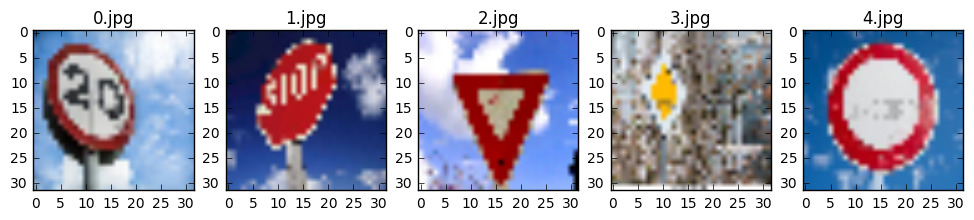

In [11]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import cv2
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook
%matplotlib inline

cimage = []
plt.figure(figsize=(12,12))
for i in range(5):
    imagePath = "./traffic-signs/captured pictures/"+str(i)+'.jpg'
    captured_image = mpimg.imread(imagePath)
    captured_image = cv2.resize(captured_image,(32,32))#,interpolation=cv2.INTER_AREA)
   
    plt.subplot(1,5,i+1)
    plt.title(str(i)+'.jpg')
    plt.imshow(captured_image,cmap = 'gray')
    cimage.append(captured_image)
newData = np.array(cimage)
newData = Preprocessing(newData)
newData_labels = np.array([0,14,13,12,15])
print("newData's Labels is:", newData_labels)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

I downloaded five images from web. As we can see, the preprocessing step reduces the resolution. And I found that in the low resolution,the outline of the images is blurred, which decrease the accuracy of model. And it may be useful to use the colors of images.

In [12]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    print('Loaded Weights and Bias successfully.')
    prediction = tf.nn.softmax(logits)
    classification = sess.run(prediction, feed_dict={x:newData})
    labels = tf.argmax(classification, 1).eval()
    print("the labels is",labels)


Loaded Weights and Bias successfully.
the labels is [37 12 13 11 15]


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [13]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    softmax = tf.nn.softmax(logits)
    top_k_probabilities_per_image = sess.run(softmax, feed_dict = {x: newData})
    top_k_op = tf.nn.top_k(top_k_probabilities_per_image, k =5)
    top_k_results = sess.run(top_k_op)
    values = top_k_results.values
    indices = top_k_results.indices
    print(top_k_results)

TopKV2(values=array([[  9.97929454e-01,   2.06486764e-03,   5.65319078e-06,
          1.43600971e-08,   2.81584644e-09],
       [  1.00000000e+00,   1.07363408e-14,   6.49328787e-16,
          3.72634993e-16,   8.52836182e-17],
       [  1.00000000e+00,   4.75136286e-34,   2.79179442e-36,
          0.00000000e+00,   0.00000000e+00],
       [  8.75795901e-01,   1.23125456e-01,   6.72308786e-04,
          2.09948077e-04,   1.77944239e-04],
       [  9.94572937e-01,   4.06086864e-03,   1.26185070e-03,
          5.42666785e-05,   3.66807690e-05]], dtype=float32), indices=array([[37, 24,  1, 39, 25],
       [12, 41, 25, 42, 35],
       [13, 35, 15,  0,  1],
       [11,  1, 40, 24, 21],
       [15, 12,  7,  4, 40]]))


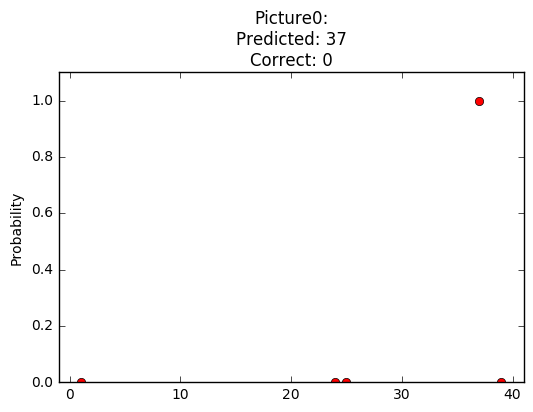

raw top_k results:

tf.nn.top_k(prediction, 5).values  [0.99792945, 0.0020648676, 5.6531908e-06, 1.4360097e-08, 2.8158464e-09]
tf.nn.top_k(prediction, 5).indices [37, 24, 1, 39, 25]




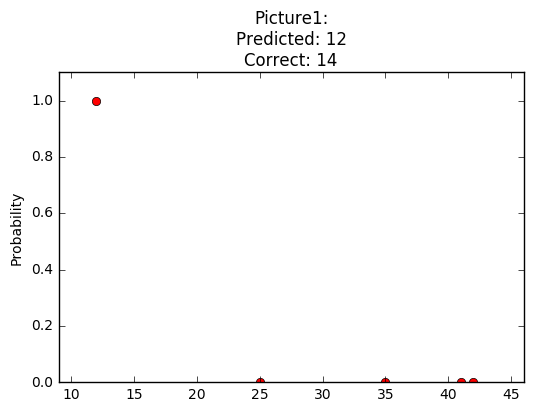

raw top_k results:

tf.nn.top_k(prediction, 5).values  [1.0, 1.0736341e-14, 6.4932879e-16, 3.7263499e-16, 8.5283618e-17]
tf.nn.top_k(prediction, 5).indices [12, 41, 25, 42, 35]




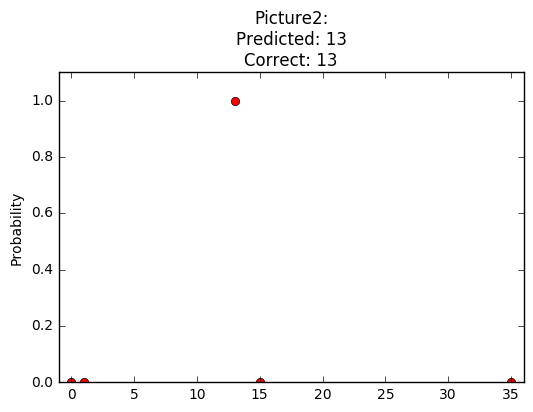

raw top_k results:

tf.nn.top_k(prediction, 5).values  [1.0, 4.7513629e-34, 2.7917944e-36, 0.0, 0.0]
tf.nn.top_k(prediction, 5).indices [13, 35, 15, 0, 1]




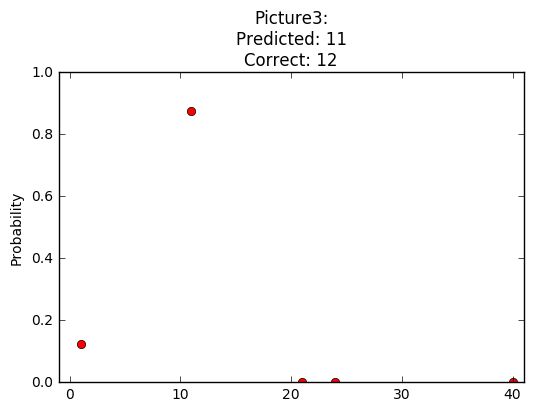

raw top_k results:

tf.nn.top_k(prediction, 5).values  [0.8757959, 0.12312546, 0.00067230879, 0.00020994808, 0.00017794424]
tf.nn.top_k(prediction, 5).indices [11, 1, 40, 24, 21]




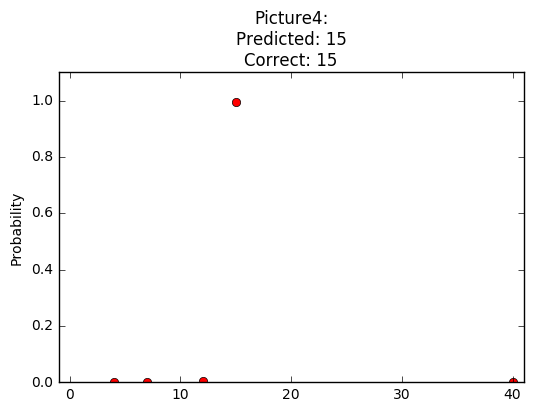

raw top_k results:

tf.nn.top_k(prediction, 5).values  [0.99457294, 0.0040608686, 0.0012618507, 5.4266678e-05, 3.6680769e-05]
tf.nn.top_k(prediction, 5).indices [15, 12, 7, 4, 40]




In [14]:
def plot_top_k_probabilities(pred_cls, pred_prob, title):
    plt.plot(list(pred_cls), list(pred_prob), 'ro')
    x1, x2, y1, y2 = plt.axis()
    plt.axis((x1-1, x2+1, y1, y2+0.1))
    
    plt.ylabel('Probability')
    plt.title(title)
    
    plt.show()
    
for i in range(len(values)):
    Predicted = indices[i][np.argmax(values[i])]
    # NOTE: You'll need to refer to your newdata's correct labels here.
    # Swap out "newdata_labels" with your actual "true labels" array.
    Corrected = newData_labels[i]
    plot_title = 'Picture'+str(i)+':\nPredicted: {}\nCorrect: {}'.format(Predicted, Corrected)
    plot_top_k_probabilities(indices[i], values[i], plot_title)
    
    print('raw top_k results:')
    print('')
    print('tf.nn.top_k(prediction, 5).values ', list(values[i]))
    print('tf.nn.top_k(prediction, 5).indices', list(indices[i]))
    
    
    print('')
    print('')
    

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**
As can be see from the above results, Picture3 and Picture4 had been predicted correctly at high certainty, and the other three pictures had been erroneously predicted. And unfortunately, the correct predictions did not appear in the top k. The model is just 20% accurate. I think there are serval ways to improve accuracy. First, I can take the channels of color into account. Second, I can generate more training data by jittering and transforming source training images.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.